Please upload GS3M Excel file


Saving PREGUNTA 19-GS3M.xlsx to PREGUNTA 19-GS3M (1).xlsx
Please upload GS6M Excel file


Saving PREGUNTA 19 - GS6M.xlsx to PREGUNTA 19 - GS6M (1).xlsx

GS3M DataFrame columns: ['obs', 'CLOSE']
GS6M DataFrame columns: ['obs', 'CLOSE']
Please enter the column name containing closing prices: CLOSE

Unit Root Tests for GS3M:
ADF Test:
ADF Statistic: -2.6871
p-value: 0.0763
Critical Values: {'1%': -3.4596204846395824, '5%': -2.8744153028455948, '10%': -2.5736320761218576}
Interpretation:
  - p-value >= 0.05: Fail to reject null - GS3M may be non-stationary

KPSS Test:
KPSS Statistic: 0.4646
p-value: 0.0496
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - GS3M is non-stationary

Unit Root Tests for GS6M:
ADF Test:
ADF Statistic: -3.4935
p-value: 0.0082
Critical Values: {'1%': -3.460567372610299, '5%': -2.874829809033386, '10%': -2.573853225954421}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - GS6M is stationary

KPSS Test:
KPSS Statistic: 0.3656
p-value: 0.0920
Critical Values: {'

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/st


Best ARIMA model for GS3M:
Order: (2, 2, 3)
AIC: 7055.89
Interpretation:
  - p=2: 2 autoregressive term(s)
  - d=2: 2 difference(s) needed for stationarity
  - q=3: 3 moving average term(s)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels


Best ARIMA model for GS6M:
Order: (3, 2, 3)
AIC: 7179.67
Interpretation:
  - p=3: 3 autoregressive term(s)
  - d=2: 2 difference(s) needed for stationarity
  - q=3: 3 moving average term(s)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


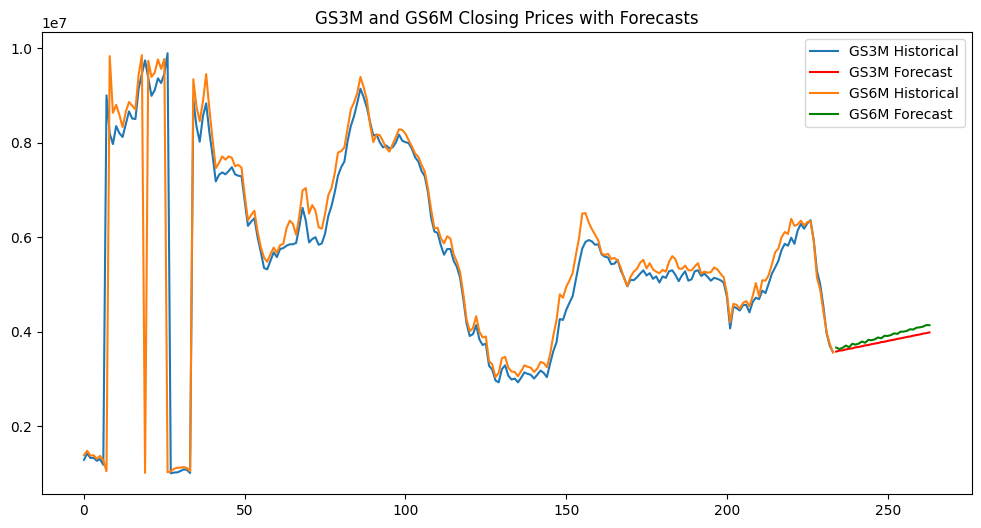

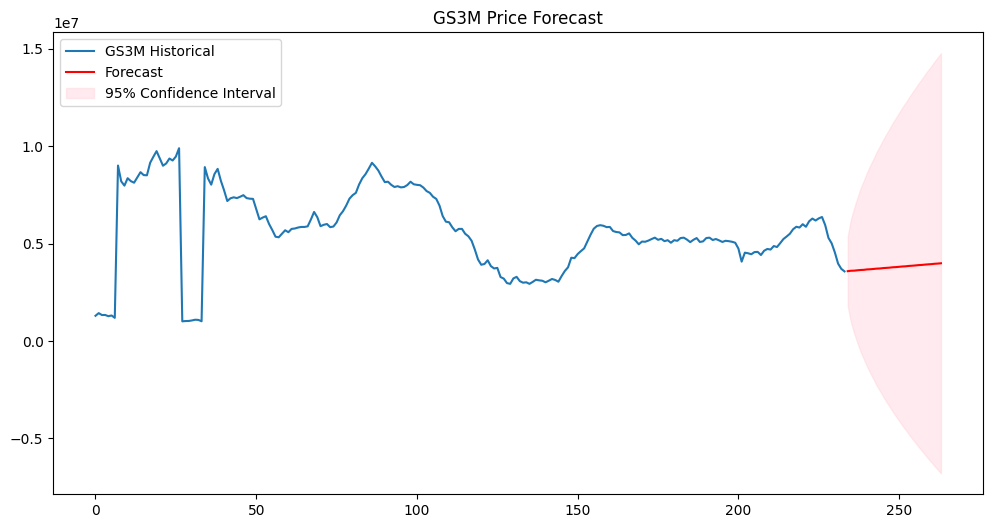


Forecast Interpretation for GS3M:
Last observed value: 3570000.00
Average forecast value: 3784834.96
Forecast change: 214834.96
Trend: Upward forecast trend
95% CI range at period 30: [-6788295.31, 14760279.06]


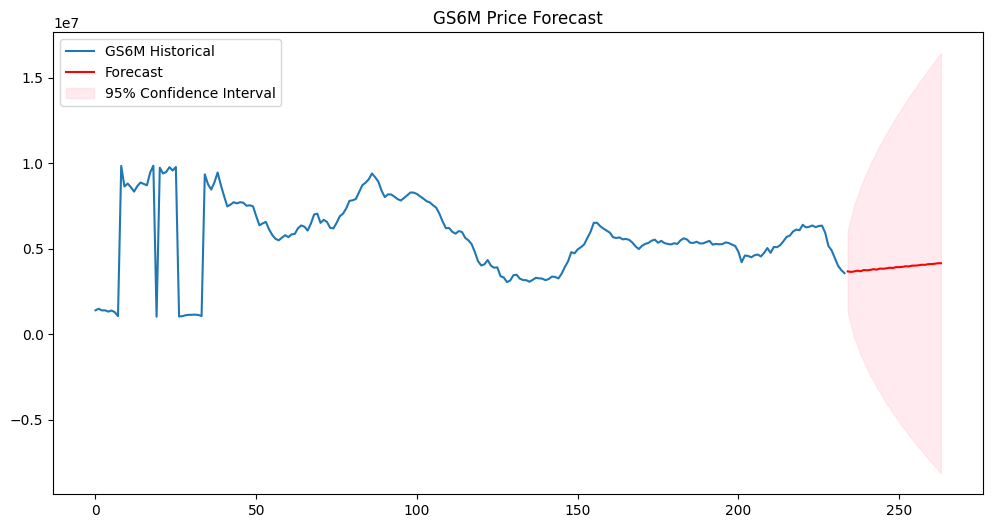


Forecast Interpretation for GS6M:
Last observed value: 3560000.00
Average forecast value: 3890998.03
Forecast change: 330998.03
Trend: Upward forecast trend
95% CI range at period 30: [-8139578.52, 16418221.36]

GS3M Forecast Values (next 5 periods):
234    3.580694e+06
235    3.602184e+06
236    3.608012e+06
237    3.626295e+06
238    3.641381e+06
Name: predicted_mean, dtype: float64

GS6M Forecast Values (next 5 periods):
234    3.665410e+06
235    3.633962e+06
236    3.661977e+06
237    3.707233e+06
238    3.673961e+06
Name: predicted_mean, dtype: float64


In [2]:
# -*- coding: utf-8 -*-
"""GS3M GS6M ARIMA.ipynb

Automatically generated by Colab.

Original file adapted for GS3M and GS6M
"""

!pip install statsmodels --upgrade

# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload GS3M Excel file")
gs3m_upload = files.upload()
gs3m_filename = list(gs3m_upload.keys())[0]
gs3m_df = pd.read_excel(gs3m_filename)

print("Please upload GS6M Excel file")
gs6m_upload = files.upload()
gs6m_filename = list(gs6m_upload.keys())[0]
gs6m_df = pd.read_excel(gs6m_filename)

# Print available columns
print("\nGS3M DataFrame columns:", list(gs3m_df.columns))
print("GS6M DataFrame columns:", list(gs6m_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    gs3m_close = gs3m_df[close_column]
    gs6m_close = gs6m_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(gs3m_close), len(gs6m_close))
gs3m_close = gs3m_close[:min_length]
gs6m_close = gs6m_close[:min_length]

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')
    print("Interpretation:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')
    print("Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

# Perform unit root tests
unit_root_tests(gs3m_close, "GS3M")
unit_root_tests(gs6m_close, "GS6M")

# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: GS3M and GS6M are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between GS3M and GS6M")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'GS3M': gs3m_close,
    'GS6M': gs6m_close
}).dropna()
cointegration_test(coint_df)

# Function to find best ARIMA model with interpretation
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("Interpretation:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order

# Find and fit best ARIMA models
gs3m_order = find_best_arima(gs3m_close, "GS3M")
gs6m_order = find_best_arima(gs6m_close, "GS6M")

# Fit final ARIMA models
gs3m_model = ARIMA(gs3m_close, order=gs3m_order).fit()
gs6m_model = ARIMA(gs6m_close, order=gs6m_order).fit()

# Forecast next 30 periods
forecast_steps = 30
gs3m_forecast = gs3m_model.forecast(steps=forecast_steps)
gs6m_forecast = gs6m_model.forecast(steps=forecast_steps)

# Create forecast index
last_index = len(gs3m_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(gs3m_close, label='GS3M Historical')
plt.plot(forecast_index, gs3m_forecast, label='GS3M Forecast', color='red')
plt.plot(gs6m_close, label='GS6M Historical')
plt.plot(forecast_index, gs6m_forecast, label='GS6M Forecast', color='green')
plt.title('GS3M and GS6M Closing Prices with Forecasts')
plt.legend()
plt.show()

# Detailed forecast plot with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")

# Generate detailed forecast plots and interpretations
plot_forecast(gs3m_model, gs3m_close, "GS3M")
plot_forecast(gs6m_model, gs6m_close, "GS6M")

# Print forecast values
print("\nGS3M Forecast Values (next 5 periods):")
print(gs3m_forecast[:5])
print("\nGS6M Forecast Values (next 5 periods):")
print(gs6m_forecast[:5])

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")